importing the dependencies...

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Data processing...

In [2]:
diabetesData = pd.read_csv(r"C:\Users\omi84\OneDrive\Desktop\Anveshan\Diabetes-Prediction\assets\diabetes.csv")
diabetesData.head(), diabetesData.shape

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 (768, 9))

In [3]:
diabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetesData['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
diabetesData.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Separting the data & label...

In [6]:
X = diabetesData.drop(columns='Outcome', axis=1)
Y = diabetesData['Outcome']
X.shape, Y.shape, X.head()

((768, 8),
 (768,),
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  )

Data Standardization...

In [7]:
scaler = StandardScaler()

In [8]:
standarizedData = scaler.fit_transform(X)
standarizedData

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
X = standarizedData
X, Y

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

Splitting the data into training & testing...

In [10]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the model --->SVM

In [11]:
classifier = svm.SVC(kernel='linear')

In [12]:
#training the support vector machine...
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model  Evaluation...

In [13]:
X_train_prediction = classifier.predict(X_train)
trainingAccuracy = accuracy_score(X_train_prediction, Y_train)


print("Accuracy score of the training data : ",trainingAccuracy)

Accuracy score of the training data :  0.7866449511400652


In [14]:
X_test_prediction = classifier.predict(X_test)
testingAccuracy = accuracy_score(X_test_prediction, Y_test)


print("Accuracy score of the testing data : ",testingAccuracy)

Accuracy score of the testing data :  0.7727272727272727


Making preediction from the model...

In [15]:
input_data = [
    (1,103,30,38,83,43.3,0.183,33),
    (1,115,70,30,96,34.6,0.529,32),
    (3,126,88,41,235,39.3,0.704,27),
    (8,99,84,0,0,35.4,0.388,50),
    (7,196,90,0,0,39.8,0.451,41),
    (9,119,80,35,0,29,0.263,29)
]

for  i in input_data:
    #changing the input data to numpy array and reshaping the data..
    ip_data_reshape = np.asarray(i).reshape(1, -1)

    #standardized the ip data..
    std_data =scaler.transform(ip_data_reshape)

    prediction = classifier.predict(std_data)
    

    if prediction[0] == 0:
        print("Non-Diabetic Patient!!")
    else:
        print("Diabetic Patient!!")

Non-Diabetic Patient!!
Non-Diabetic Patient!!
Non-Diabetic Patient!!
Non-Diabetic Patient!!
Diabetic Patient!!
Non-Diabetic Patient!!


C:\Users\omi84\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\omi84\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\omi84\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\omi84\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

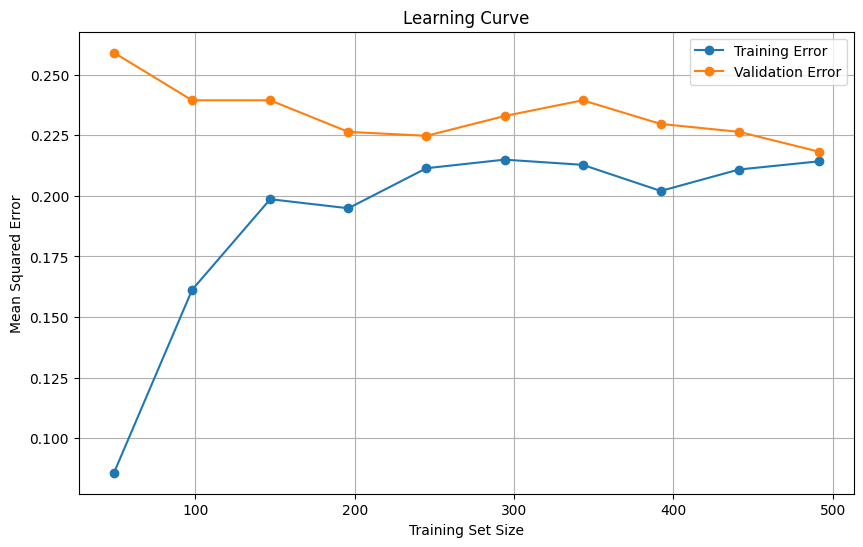

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    classifier, X_train, Y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative MSE to positive for plotting
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()